In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the CSV file
df = pd.read_csv("../../benchmarking_other_papers/4zzi_5c8s_closest_rmsd_per_ligand.csv")

In [20]:
df

,publication,ligand,rmsd
0,Singh et al,Z1907784975,1.822773
1,Singh et al,Z2732986066,0.624851
2,Singh et al,Z3343635604,2.767276
3,Singh et al,Z4324535763,2.767588
4,Singh et al,Z5185631889,2.033629
5,Singh et al,Z5185631911,1.642879
6,Singh et al,Z5348530222,6.791365
7,Singh et al,Z5348530626,2.668989
8,Singh et al,Z5348530683,1.591859
9,Singh et al,Z5348530741,5.789601


In [21]:
#sort
df = df.sort_values(by="rmsd", ascending=False)

In [22]:
# Assign colors based on publication using seaborn's color palette
publications = df["publication"].unique()
palette = sns.color_palette("Set2", len(publications))
color_map = dict(zip(publications, palette))
bar_colors = df["publication"].map(color_map)

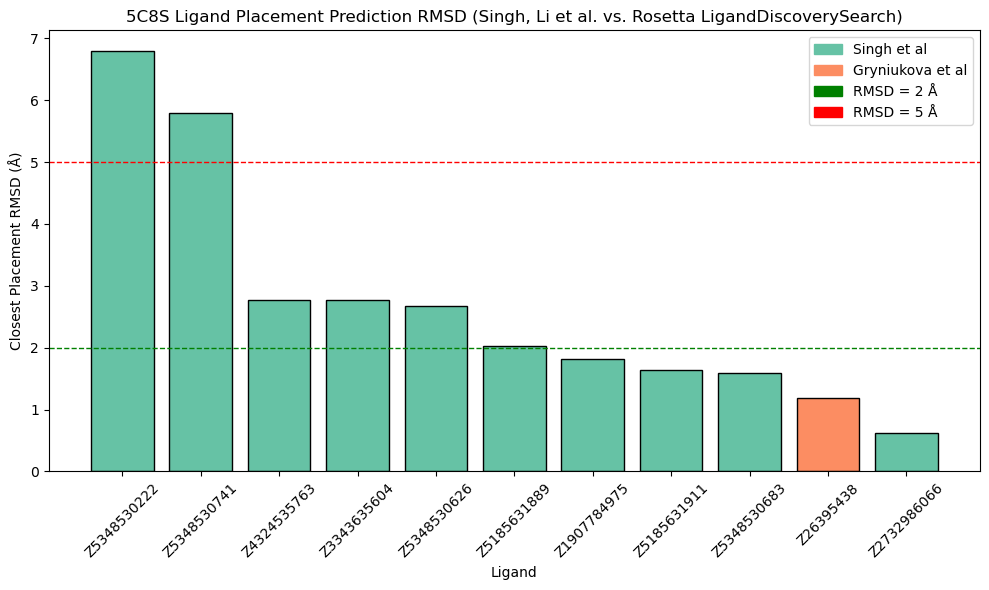

In [26]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df["ligand"], df["rmsd"], color=bar_colors, edgecolor="black")

# Labeling
plt.xlabel("Ligand")
plt.ylabel("Closest Placement RMSD (Å)")
plt.title("5C8S Ligand Placement Prediction RMSD (Singh, Li et al. vs. Rosetta LigandDiscoverySearch)")
plt.xticks(rotation=45, ha="center")
# Horizontal cutoff lines
plt.axhline(y=2, color='green', linestyle='--', linewidth=1, label='RMSD = 2 Å')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='RMSD = 5 Å')

# Custom legend for publications
from matplotlib.patches import Patch
legend_patches = [Patch(color=color_map[pub], label=pub) for pub in publications]
plt.legend(handles=legend_patches + [  # Add the RMSD cutoff lines to the legend
    Patch(color='green', label='RMSD = 2 Å'),
    Patch(color='red', label='RMSD = 5 Å')],
    loc='upper right'
)

plt.tight_layout()

# Show the plot
plt.show()